In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers, Model
from sklearn.model_selection import train_test_split

import numpy as np
from keras import Model
from keras.layers import Conv2D, PReLU,BatchNormalization, Flatten
from keras.layers import UpSampling2D, LeakyReLU, Dense, Input, add
from tqdm import tqdm

from PIL import Image
import shutil

In [2]:
#link google colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Test - perform super resolution using saved generator model
from keras.models import load_model
from numpy.random import randint

generator20 = load_model('/content/drive/MyDrive/models2/gen_e_20.h5', compile=False)

In [ ]:
# folder path
lr_dir_path = r'/content/drive/MyDrive/Data_Full/lr_images'
hr_dir_path = r'/content/drive/MyDrive/Data_Full/hr_images'

In [ ]:
lr_list = os.listdir(lr_dir_path)

lr_images = []
for img in lr_list:
    img_lr = cv2.imread(lr_dir_path +"/" + img)
    img_lr = cv2.cvtColor(img_lr, cv2.COLOR_BGR2RGB)
    lr_images.append(img_lr) 

In [ ]:
hr_list = os.listdir(hr_dir_path)
   
hr_images = []
for img in hr_list:
    img_hr = cv2.imread(hr_dir_path + "/" + img)
    img_hr = cv2.cvtColor(img_hr, cv2.COLOR_BGR2RGB)
    hr_images.append(img_hr) 

In [ ]:
lr_images = np.array(lr_images)
hr_images = np.array(hr_images)

In [ ]:
#Scale values
lr_images = lr_images / 255.
hr_images = hr_images / 255.

In [ ]:
#Split to train and test
lr_train, lr_test, hr_train, hr_test = train_test_split(lr_images, hr_images, 
                                                      test_size=0.6, random_state=42)

In [ ]:
[X1, X2] = [lr_test, hr_test]
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]

# generate image from source
gen_image = generator20.predict(src_image)

1/1 [==============================] - 0s 336ms/step


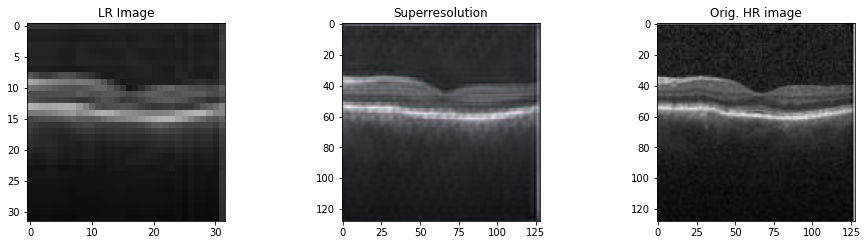

In [ ]:
# plot all three images

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('LR Image')
plt.imshow(src_image[0,:,:,:])
plt.subplot(232)
plt.title('Superresolution')
plt.imshow(gen_image[0,:,:,:])
plt.subplot(233)
plt.title('Orig. HR image')
plt.imshow(tar_image[0,:,:,:])

plt.show()

In [4]:
def generate_img(image_path):
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img / 255.
  img = np.expand_dims(img, axis=0)
  generated_img = generator20.predict(img)
  return generated_img

In [11]:
import numpy as np
import os

source_folder = '/content/drive/MyDrive/Data_Small2/lr_images/val/DME'  
destination_folder = '/content/drive/MyDrive/Data_Small2/SRGAN_images/val/DME/'  

counter = 0
for filename in os.listdir(source_folder):
    print(counter)
    counter += 1
    if filename.endswith('.jpeg'):
        image_path = os.path.join(source_folder, filename)
        gen_image = generate_img(image_path)
        data = gen_image
        data = data * 255.0
        data = data.astype(np.uint8)
        image = Image.fromarray(data[0])
        image.save(destination_folder + "DME" + str(counter) + ".jpeg")
        


0
1/1 [==============================] - 0s 193ms/step
1
1/1 [==============================] - 0s 188ms/step
2
1/1 [==============================] - 0s 212ms/step
3
1/1 [==============================] - 0s 404ms/step
4
1/1 [==============================] - 0s 359ms/step
5
1/1 [==============================] - 0s 265ms/step
6
1/1 [==============================] - 0s 191ms/step
7
1/1 [==============================] - 0s 178ms/step
8
1/1 [==============================] - 0s 230ms/step
9
1/1 [==============================] - 0s 247ms/step
10
1/1 [==============================] - 0s 243ms/step
11
1/1 [==============================] - 0s 231ms/step
12
1/1 [==============================] - 0s 194ms/step
13
1/1 [==============================] - 0s 176ms/step
14
1/1 [==============================] - 0s 176ms/step
15
1/1 [==============================] - 0s 179ms/step
16
1/1 [==============================] - 0s 182ms/step
17
1/1 [==============================] - 0s 216ms/step
18

In [10]:
import numpy as np
import os

source_folder = '/content/drive/MyDrive/Data_Small2/lr_images/val/DRUSEN'  
destination_folder = '/content/drive/MyDrive/Data_Small2/SRGAN_images/val/DRUSEN/'  

counter = 0
for filename in os.listdir(source_folder):
    print(counter)
    counter += 1
    if filename.endswith('.jpeg'):
        image_path = os.path.join(source_folder, filename)
        gen_image = generate_img(image_path)
        data = gen_image
        data = data * 255.0
        data = data.astype(np.uint8)
        image = Image.fromarray(data[0])
        image.save(destination_folder + "DRUSEN" + str(counter) + ".jpeg")
        


0
1/1 [==============================] - 0s 180ms/step
1
1/1 [==============================] - 0s 243ms/step
2
1/1 [==============================] - 0s 270ms/step
3
1/1 [==============================] - 0s 229ms/step
4
1/1 [==============================] - 0s 241ms/step
5
1/1 [==============================] - 0s 220ms/step
6
1/1 [==============================] - 0s 213ms/step
7
1/1 [==============================] - 0s 244ms/step
8
1/1 [==============================] - 0s 191ms/step
9
1/1 [==============================] - 0s 175ms/step
10
1/1 [==============================] - 0s 186ms/step
11
1/1 [==============================] - 0s 185ms/step
12
1/1 [==============================] - 0s 184ms/step
13
1/1 [==============================] - 0s 187ms/step
14
1/1 [==============================] - 0s 176ms/step
15
1/1 [==============================] - 0s 190ms/step
16
1/1 [==============================] - 0s 187ms/step
17
1/1 [==============================] - 0s 190ms/step
18

In [ ]:
import numpy as np
from PIL import Image
import shutil

source_folder = '/content/drive/MyDrive/Data_Full/SRGAN_images/npyDME/'  
folder1 = '/content/drive/MyDrive/Data_Full/SRGAN_images/DRUSEN/' 
folder2 = '/content/drive/MyDrive/Data_Full/SRGAN_images/DME/' 
counter1 = 0
counter2 = 0
for file_name in os.listdir(source_folder):
    if file_name.startswith('DRUSEN'):
        counter1 += 1
        data = np.load(source_folder + file_name)
        data = data * 255.0
        data = data.astype(np.uint8)
        image = Image.fromarray(data[0])
        image.save(folder1 + "DRUSEN" + str(counter1) + ".jpeg")
    elif file_name.startswith('DME'):
        counter2 += 1
        data = np.load(source_folder + file_name)
        data = data * 255.0
        data = data.astype(np.uint8)
        image = Image.fromarray(data[0])
        image.save(folder2 + "DME" + str(counter2) + ".jpeg")


In [ ]:
counter3 = 0
for file_name in os.listdir("/content/drive/MyDrive/Data_Full/SRGAN_images/DME"):
    if file_name.endswith('.jpeg'):
        counter3 += 1

print(counter3)


10847


In [ ]:
from PIL import Image
cont = 0
for img in os.listdir("/content/drive/MyDrive/Data_Full/train/DME/"):
    cont += 1
    print(cont)
    image = Image.open("/content/drive/MyDrive/Data_Full/train/DME/" + img)

    lr_image_resized = image.resize((32, 32))
    lr_image_resized.save("/content/drive/MyDrive/Data_Full/lr_DME_images2/"+img)

Streaming output truncated to the last 5000 lines.
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037